<a href="https://colab.research.google.com/github/Syomara/Data-Science-1/blob/main/ProyectoDS_Parte_1_Bazzini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Visualizaciones en Python
# Primera Entrega
Archivo: ProyectoDS_ParteI_TuApellido.ipynb

# 📌 Resumen

Este proyecto utiliza un dataset denominado Delitos denunciados en Uruguay que proviene del Catálogo de Datos Abiertos de Uruguay. El mismo detalla información de todos los delitos denunciados desde Enero 2013 a Abril del 2025, dentro de los datos incluidos en el dataset se encuentran: fecha y lugar del delito, jurisdicción donde ocurrió, motivo aparente y arma utilizada, además se aclara si el delito llegó a aclararse o no y, por último, datos personales de la victima.

Durante este proyecto se comenzará realizando un análisis de los datos para evaluar si faltan datos en el dataset y se decidirá que realizar de acuerdo al resultado de esta evaluación. Por otro lado se crearán visualizaciones simples utilizando herramientas de Phyton como Matplotlib, Pandas y Seaborn, de esta manera se determinarán las conclusiones y se responderan preguntas claves para el cumplimiento de los objetivos del proyecto.


El objetivo del proyecto es evaluar en que lugar del Uruguay ocurren la mayor cantidad de delitos, además de evaluar si existe algún patrón en las victimas de estos delitos.

# ❓Preguntas / Hipótesis de interés

1.   ¿En qúe localidad de Uruguay se encuentran la mayor cantidad de delitos denuciados?
2.   ¿Cómo se distribuyen estos delitos a lo largo de los años?
3.   ¿Qué género es más común en las victimas?
4.   ¿Cuán común es la resolución del delito?

# Objetivo del Proyecto
El objetivo de este proyecto es desarrollar un modelo predictivo de la problemática de los delitos en Uruguay generando una base de estudio para estratificar más fácilmente donde está el problema de delitos y así generar un pareto que permita resolver el problema más fácilmente atacando la mayor cantidad de causas.

# 📊 Visualizaciones y Análisis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Syomara/Data-Science-1/main/homicidios_dolosos_consumados(1).csv', encoding='latin-1')
df.head()

,ID_VICTIMA,FECHA,AÑO,MES,TRIMESTRE,DIA_SEMANA,HORA,DEPARTAMENTO,JURISDICCION,LUGAR,...,ARMAREC,PROCESADOS,MENORESCINICIOPROC,ACLARADO,SEXO,EDADCALC,NACIONALIDAD,ANTECEDENTES,ANTECEDENTESPORESTUPEFACIENTES,REL_VICT_AGRES
0,AAA1134816,30.04.2021,2021,ABRIL,SEGUNDO TRIMESTRE,VIERNES,8,CANELONES,SECCIONAL 28,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,39,URUGUAYA,ANTECEDENTES POR DELITOS NO VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
1,AAA1146478,30.04.2021,2021,ABRIL,SEGUNDO TRIMESTRE,VIERNES,13,MONTEVIDEO,SECCIONAL 24,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,33,URUGUAYA,ANTECEDENTES POR AMBOS TIPOS DE DELITOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
2,AAA128234,28.04.2021,2021,ABRIL,SEGUNDO TRIMESTRE,MIERCOLES,22,MONTEVIDEO,SECCIONAL 14,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,31,URUGUAYA,ANTECEDENTES POR DELITOS VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO
3,AAA199424,28.04.2021,2021,ABRIL,SEGUNDO TRIMESTRE,MIERCOLES,20,TACUAREMBO,SECCIONAL 2,RESIDENCIA,...,CORTO / PUNZANTE,AUTOR MAYOR FALLECIDO,SIN MENORES C/INICIO PROC.,ACLARADO,MUJER,60,URUGUAYA,SIN ANTECEDENTES,SIN ANTECEDENTES,PAREJA/EX PAREJA
4,AAB1152814,16.04.2021,2021,ABRIL,SEGUNDO TRIMESTRE,VIERNES,18,MONTEVIDEO,SECCIONAL 15,VIA PUBLICA U OTROS ESPACIOS ABIERTOS,...,ARMA DE FUEGO,SIN PROCESADOS,SIN MENORES C/INICIO PROC.,SIN ACLARAR,HOMBRE,28,URUGUAYA,ANTECEDENTES POR DELITOS VIOLENTOS,SIN ANTECEDENTES,VINCULO DESCONOCIDO


# Items faltantes

In [2]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


En este caso la Base de datos está completa por lo que no es necesario eliminar ningún linea.
# Análisis Univariado
**Cantidad de Delitos por Departamento**


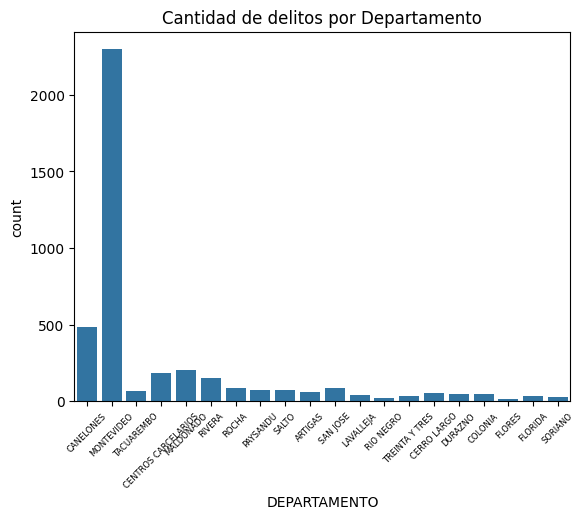

In [3]:
sns.countplot(x='DEPARTAMENTO', data=df)
plt.title('Cantidad de delitos por Departamento')
plt.xticks(fontsize=6,rotation=45)
plt.show()

En este gráfico se puede observar fácilmente que el Departamento donde más ocurren los delitos son Montevideo y Canelones; considerando que son los Departamentos que más gente tiene, no es raro que se dé de esta manera.

**Distribución de Cantidad de delitos por Año**

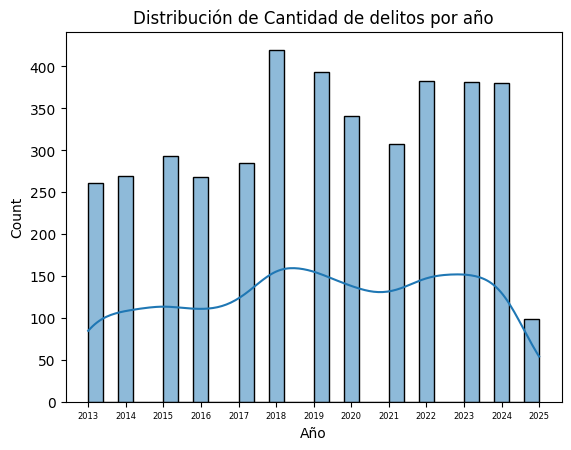

In [4]:
sns.histplot(df['AÑO'], bins=30, kde=True)
plt.title('Distribución de Cantidad de delitos por año')
plt.xlabel('Año')
years = sorted(df['AÑO'].unique())
plt.xticks(years,fontsize=6)
plt.show()

No existe una mejora ni un aumento de la cantidad de delitos de manera significativa en los últimos años, si se observa un salto muy grande desde 2017 al 2018 que en los años siguientes no disminuye de manera significativa. En 2025 aún hay "pocos" delitos pero asumiendo que faltan 8 meses aún en la base de datos no podemos sacar ninguna conclusión.

# 🔀 Análisis Bivariado
**Delitos divididos por Año y genero de la victima**

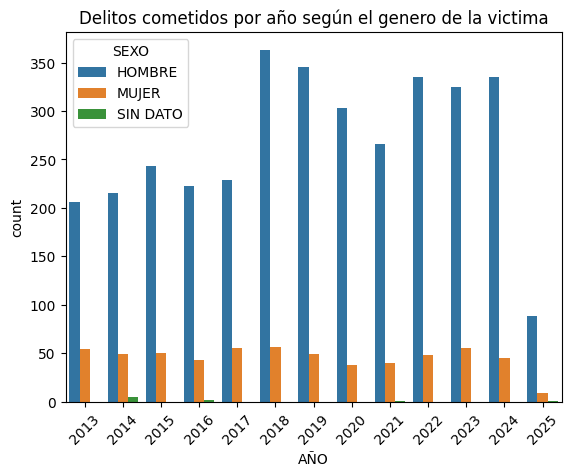

In [5]:
sns.countplot(data=df, x='AÑO', hue='SEXO')
plt.xticks(rotation=45)
plt.title('Delitos cometidos por año según el genero de la victima')
plt.show()

Existen más delitos en los cuales las victimas son hombres; además, son muy pocos los casos donde no se pudo determinar el sexo de la persona.

**Distribución de delitos por horario cometido con Victimas Hombres**

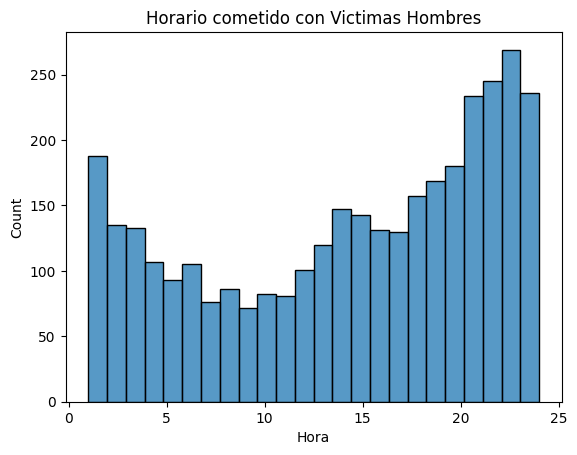

In [13]:
df_distribucion = df[df['SEXO'] == 'HOMBRE'].copy()
df_distribucion['HORA'] = pd.to_numeric(df_distribucion['HORA'], errors='coerce')
df_distribucion = df_distribucion.dropna(subset=['HORA'])
df_distribucion['HORA'] = df_distribucion['HORA'].astype(int)

sns.histplot(data=df_distribucion, x='HORA', bins=24)
plt.title('Horario cometido con Victimas Hombres')
plt.xlabel('Hora')
plt.show()

Existe una mayor cantidad de delitos contra hombres en los horarios nocturnos, principalmente entre las 21 y las 0hs.

**Distribución de delitos por horario cometido con Victimas Mujeres**


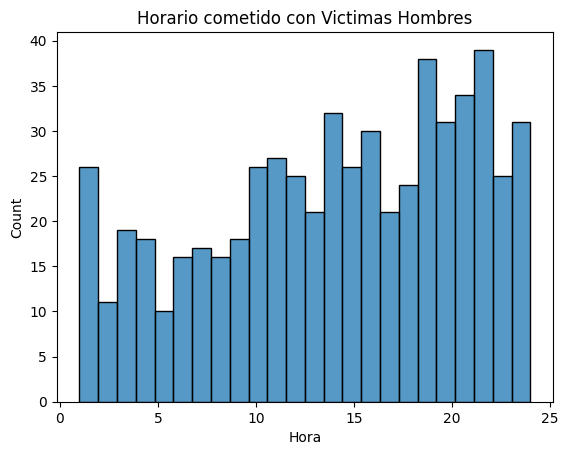

In [14]:
df_distribucion = df[df['SEXO'] == 'MUJER'].copy()
df_distribucion['HORA'] = pd.to_numeric(df_distribucion['HORA'], errors='coerce')
df_distribucion = df_distribucion.dropna(subset=['HORA'])
df_distribucion['HORA'] = df_distribucion['HORA'].astype(int)

sns.histplot(data=df_distribucion, x='HORA', bins=24)
plt.title('Horario cometido con Victimas Hombres')
plt.xlabel('Hora')
plt.show()

En las mujeres si la ejecución de los delitos fue más variada en el rango horario, va en aumento hacia la noche pero también existen muchos en otros horarios.
# 🔁 4. Análisis Multivariado
**Género de Víctima vs Arma de fuego utilizada**

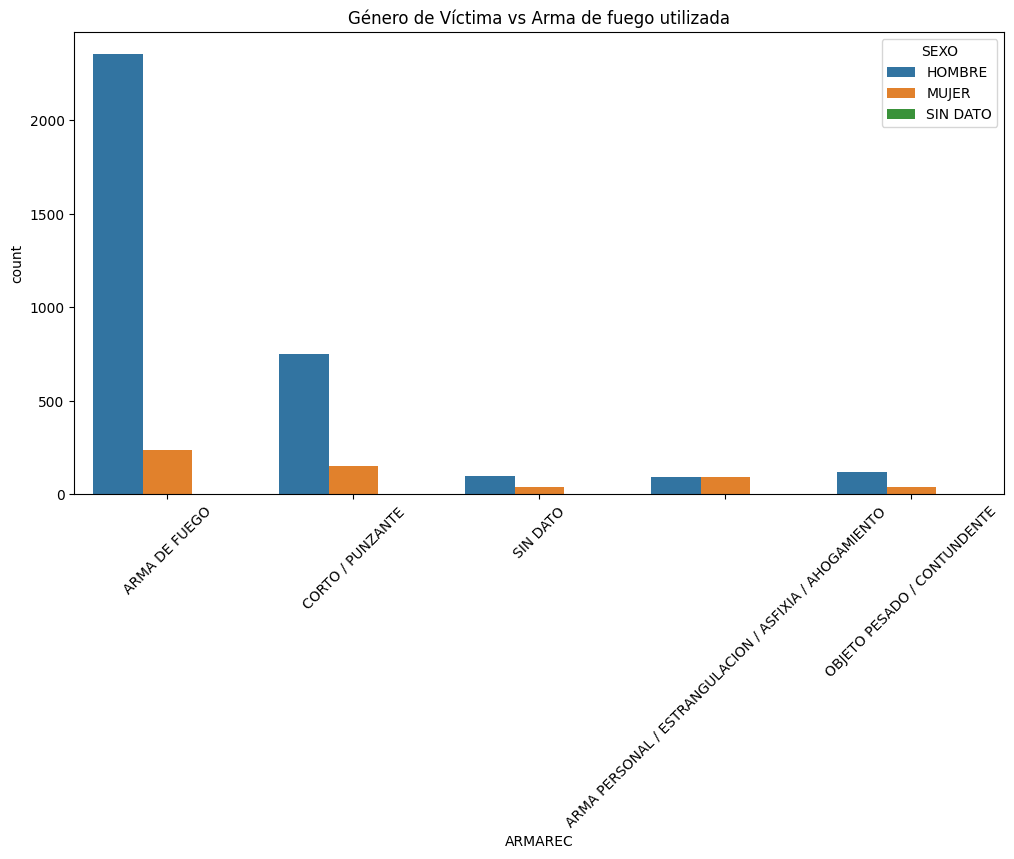

In [19]:
top_countries = df['ARMAREC'].value_counts().head(5).index
df_top = df[df['ARMAREC'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='ARMAREC', hue='SEXO')
plt.xticks(rotation=45)
plt.title('Género de Víctima vs Arma de fuego utilizada')
plt.show()

